# Soil Analysis 

Analysis of the soil characteristics of each plot. Data from Soil Conseil, from 10 plots in 2023. 

In [27]:
import pandas as pd
import os

# Statics 
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# Visualizations 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load data

In [4]:
# set the directory 
os.chdir('/Users/lfloerl/Desktop/MICROTERROIR/curated_data')

In [23]:
df = pd.read_csv('Soil_conseil_2023.csv', index_col=0)

# drop NaN cols and non-numeric ones 
df.dropna(axis=1, inplace=True)
df.drop(columns=['Gravel_Percentage', 'Gravel_Estimate'], axis=1, inplace=True)
df.head()

,Organic_Matter,C_total,Clay_Percentage,Silt_Percentage,Sand_Percentage,N_total,CN_ratio
Plot,,,,,,,
Plot_4,1.9,3.2775,32.9,41.1,26.0,0.13,8.3
Plot_12,3.1,5.3475,34.0,41.3,24.7,0.18,10.0
Plot_9,1.7,2.9325,22.9,42.4,34.7,0.11,9.5
Plot_15,2.6,4.4850,25.6,30.6,43.8,0.16,9.2
Plot_5,1.6,2.7600,29.5,38.5,32.1,0.11,8.7


In [38]:
df_granulo = df[['Clay_Percentage', 'Silt_Percentage', 'Sand_Percentage']]
df_CN = df[['Organic_Matter', 'N_total', 'CN_ratio']]

## Visualizations 
> Heatmap of different characteristics 
> PCA to see if Plots are distinct - does that make sense? 

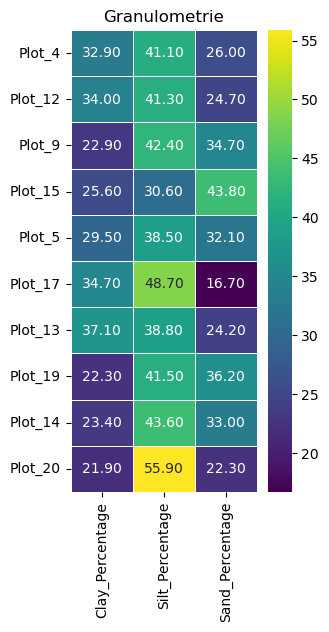

In [44]:
# Heatmap for Granulometrie 
plt.figure(figsize=(3, 6))
sns.heatmap(df_granulo, cmap='viridis', annot=True, fmt='.2f', linewidths=.5)

# Set plot labels and title
plt.xlabel('')
plt.ylabel('')
plt.title('Granulometrie')

# Show the plot
plt.show()

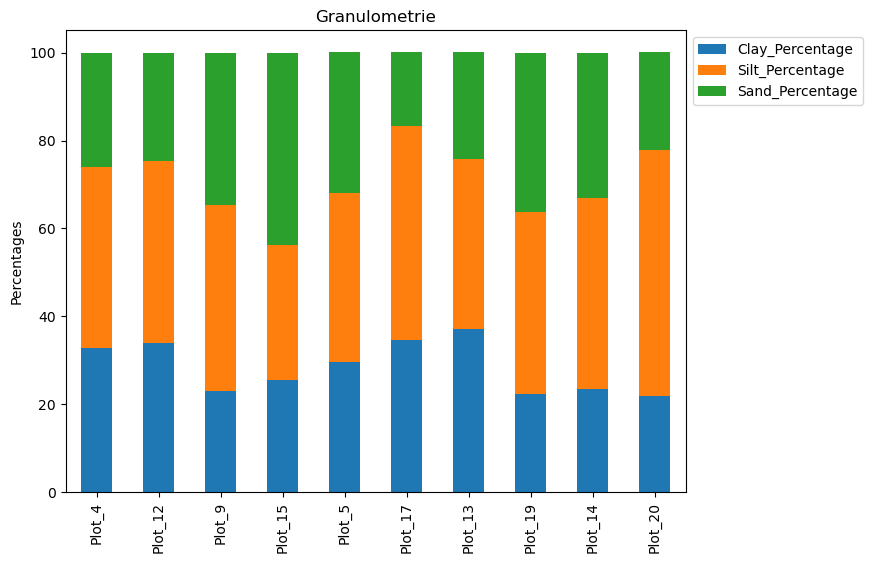

In [50]:
# Create a stacked bar plot for all columns
ax = df_granulo.plot(kind='bar', stacked=True, figsize=(8, 6))

# Add labels and legend
ax.set_ylabel('Percentages')
ax.set_xlabel('')
ax.set_title('Granulometrie')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


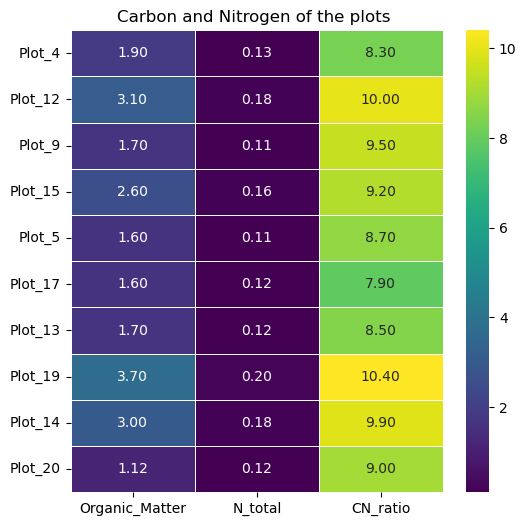

In [43]:
# Heatmap for C and N  
plt.figure(figsize=(6, 6))
sns.heatmap(df_CN, cmap='viridis', annot=True, fmt='.2f', linewidths=.5)

# Set plot labels and title
plt.xlabel('')
plt.ylabel('')
plt.title('Carbon and Nitrogen of the plots ')

# Show the plot
plt.show()

### PCA
... this is not really helpful 
--> maybe shows that none of the plots cluster tightly together when it comes to their soil characteristics, good spread? 

In [24]:
# scale the data to the range between 0 and 1 before using PCA
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(df)

In [25]:
# explaine 95% of variance
pca = PCA(n_components = 0.95)
pca.fit(data_rescaled)
reduced = pca.transform(data_rescaled)

data_pca = df.copy()

# Add PCA results to dataframe
data_pca['PC1'] = reduced[:, 0]
data_pca['PC2'] = reduced[:, 1]

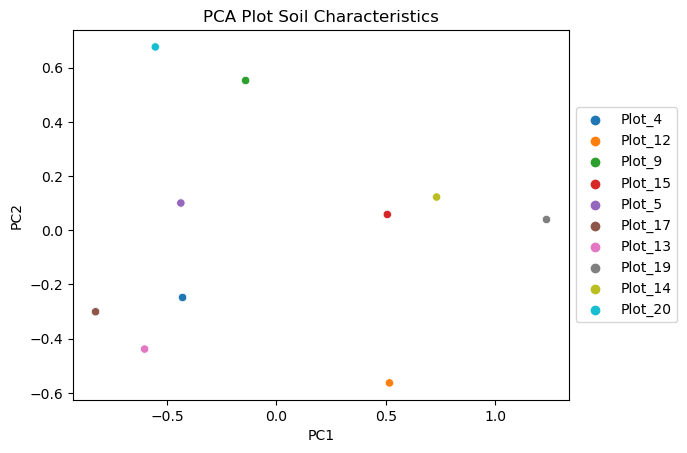

In [31]:
# Plot scatterplot with colors based on Plot 
sns.scatterplot(data=data_pca, x='PC1', y='PC2',hue=data_pca.index)
plt.title('PCA Plot Soil Characteristics')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()